In [3]:
import pandas as pd

#Loading data 
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


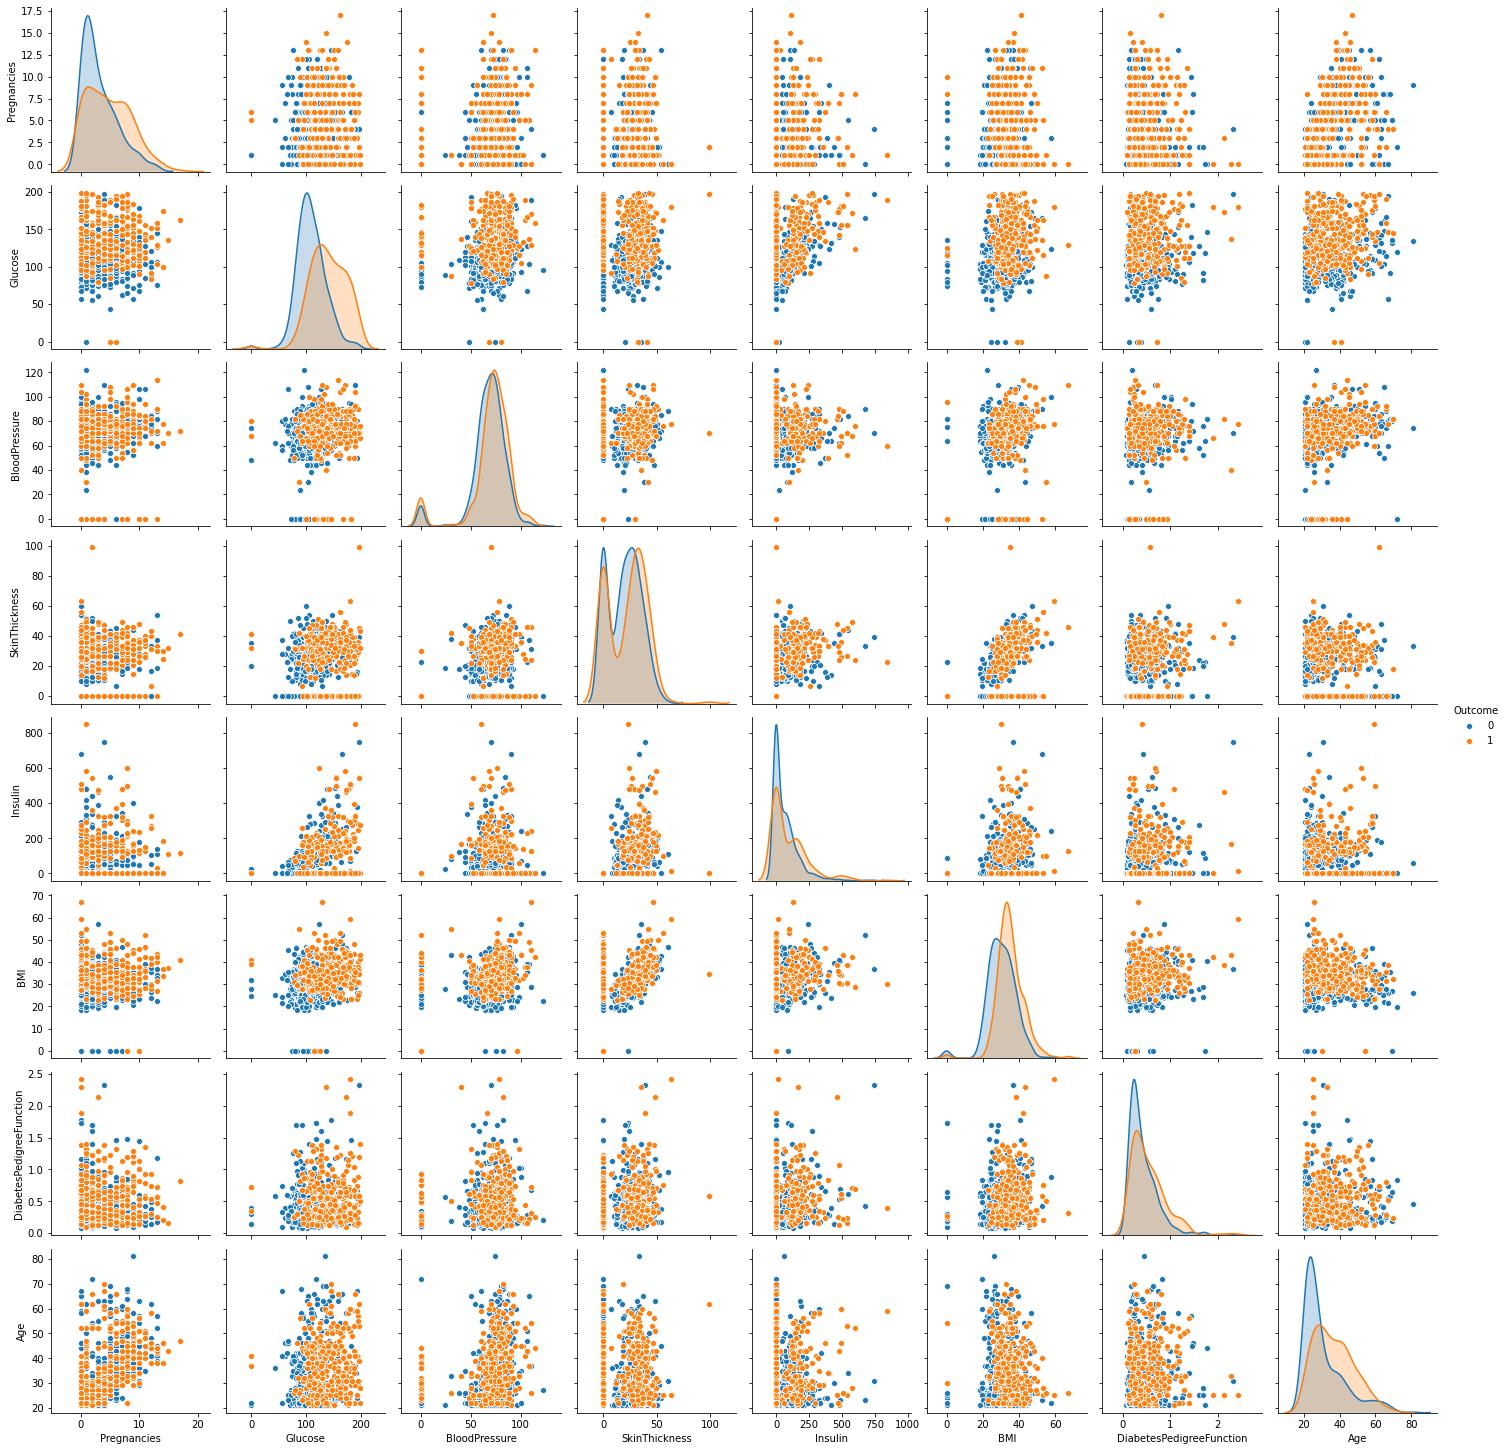

In [4]:
import seaborn as sns
from sklearn.model_selection import train_test_split

#Checking data distributions
sns.pairplot(df,hue="Outcome")

In [5]:
X=df.drop('Outcome',axis=1).values#independent features
y=df['Outcome'].values#dependent features

#Splitting data 80% training and 20% validation 
x_train,x_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
#Libraries From Pytorch
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler  
import torch.nn.functional as F

In [7]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)

In [8]:
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(x_train), 
                       torch.FloatTensor(y_train))
## test data    
class valData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

valid_data = valData(torch.FloatTensor(x_valid))

In [9]:
#Converting data into tensors
X_train=torch.FloatTensor(x_train)
X_valid=torch.FloatTensor(x_valid)
y_train=torch.LongTensor(y_train)
y_valid=torch.LongTensor(y_valid)

In [15]:
X_train_tensor = torch.from_numpy(np.array(X_train))
Y_train_tensor = torch.from_numpy(np.array(y_train))
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, 
                                                Y_train_tensor)



In [16]:
train_loader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=valid_data, batch_size=32)

In [17]:
#Creating model
class NN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=64,hidden2=64,hidden3=64,hidden4=64,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.f_connected3=nn.Linear(hidden2,hidden3)
        self.f_connected4=nn.Linear(hidden3,hidden4)
        self.out=nn.Linear(hidden4,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=F.sigmoid(self.f_connected3(x))
        x=F.sigmoid(self.f_connected3(x))
        x=self.out(x)
        return x

In [18]:
torch.manual_seed(40)
model=NN_Model()

In [19]:

model.parameters

<bound method Module.parameters of NN_Model(
  (f_connected1): Linear(in_features=8, out_features=64, bias=True)
  (f_connected2): Linear(in_features=64, out_features=64, bias=True)
  (f_connected3): Linear(in_features=64, out_features=64, bias=True)
  (f_connected4): Linear(in_features=64, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=2, bias=True)
)>

In [20]:
#Loss function and Optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.0001)

In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


NN_Model(
  (f_connected1): Linear(in_features=8, out_features=64, bias=True)
  (f_connected2): Linear(in_features=64, out_features=64, bias=True)
  (f_connected3): Linear(in_features=64, out_features=64, bias=True)
  (f_connected4): Linear(in_features=64, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=2, bias=True)
)

In [23]:
#Training loop 
epochs=1000
final_losses=[]#Training loss
final_val_losses=[]#Validation loss
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    y_pred_val=model.forward(X_valid)
    loss=loss_function(y_pred,y_train)
    loss_val=loss_function(y_pred_val,y_valid)
    final_losses.append(loss)
    final_val_losses.append(loss_val)
    if i%20==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 0.6874797344207764
Epoch number: 21 and the loss : 0.6655493378639221
Epoch number: 41 and the loss : 0.655387282371521
Epoch number: 61 and the loss : 0.6523235440254211
Epoch number: 81 and the loss : 0.6514334678649902
Epoch number: 101 and the loss : 0.6507004499435425
Epoch number: 121 and the loss : 0.6497610211372375
Epoch number: 141 and the loss : 0.6485211849212646
Epoch number: 161 and the loss : 0.6468721032142639
Epoch number: 181 and the loss : 0.6446585059165955
Epoch number: 201 and the loss : 0.6417007446289062
Epoch number: 221 and the loss : 0.637782096862793
Epoch number: 241 and the loss : 0.6326571106910706
Epoch number: 261 and the loss : 0.6260839104652405
Epoch number: 281 and the loss : 0.6179009079933167
Epoch number: 301 and the loss : 0.608035683631897
Epoch number: 321 and the loss : 0.596603274345398
Epoch number: 341 and the loss : 0.5839036703109741
Epoch number: 361 and the loss : 0.5704105496406555
Epoch number: 381 and 

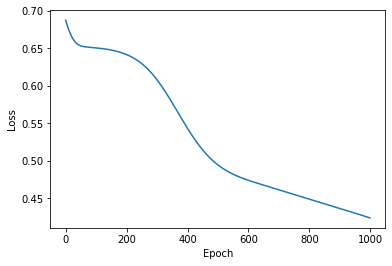

In [29]:
#plotting the training loss
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

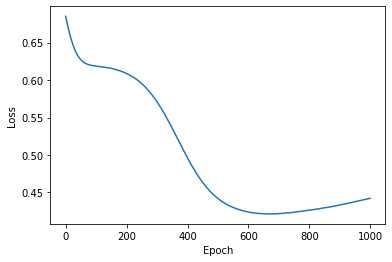

In [30]:
#plotting the validation loss
plt.plot(range(epochs),final_val_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [31]:
#Predictions
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_valid):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
1
0
1
0
0
0
1
0
0
0
1
1
0
0
0
1
0
1
0
1
1
0
0
0
0
0
0
1
0
0
1
1
1
1
0
1
0
0
1
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
1
0
0
1
1
0
0
0
0
0
1
0
0
0
0
1
0
0
1
1
0
1
0
1
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0


In [32]:
#Evaluations metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_valid,predictions)
cm

array([[91, 16],
       [15, 32]], dtype=int64)

Text(69.0, 0.5, 'Predicted Values')

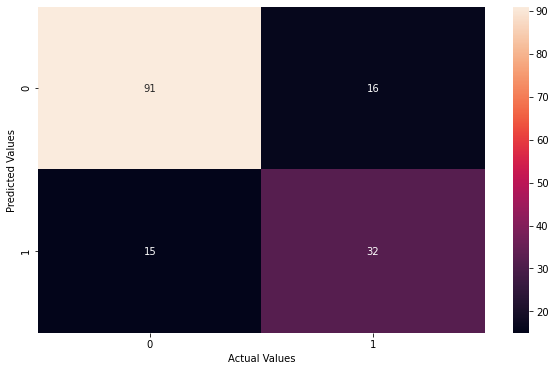

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [34]:
from sklearn.metrics import classification_report

#Printing a classification report to get a full picture of how well the predictions are 
print(classification_report(y_valid,predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       107
           1       0.67      0.68      0.67        47

    accuracy                           0.80       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.80      0.80      0.80       154

